We want to answer some questions based on the data below. Here is a breakdown of what we are investigating.
: Do yellow taxi passengers in New York City tip drivers more in the winter or summer?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

taxi = pd.read_csv('taxi.csv')
taxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,5.565045e-17,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [3]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5


In [4]:
taxi.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
195,2.0,2019-01-18 08:42:15,2019-01-18 08:56:57,1.0,1.18,1.0,N,43,237,1.0,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1.0,2019-01-19 04:34:45,2019-01-19 04:43:44,1.0,2.30,1.0,N,148,234,1.0,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2.0,2019-01-05 10:37:39,2019-01-05 10:42:03,1.0,0.83,1.0,N,237,263,1.0,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2.0,2019-01-23 10:36:29,2019-01-23 10:44:34,2.0,1.12,1.0,N,144,113,2.0,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0
199,2.0,2019-01-30 06:55:58,2019-01-30 07:07:02,5.0,2.41,1.0,N,209,107,1.0,10.5,0.0,0.5,1.00,0.0,0.3,12.30,0.0


I change the data pickup times and only worked with the months so that I can have an accurate view of months of winter and summer.

In [5]:
taxi ['pick_up_month'] = pd.to_datetime(taxi['tpep_pickup_datetime']).dt.month
taxi ['drop_off_month'] = pd.to_datetime(taxi['tpep_dropoff_datetime']).dt.month

In [6]:
print(taxi['pick_up_month'].tail())

195    1
196    1
197    1
198    1
199    1
Name: pick_up_month, dtype: int32


In [7]:
print(taxi.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'pick_up_month', 'drop_off_month']


I plotted pick_up_month against tips to see the relationship and visualized it and we can see that there is a small upward trend concluding that passengers often tip more during summertimes.

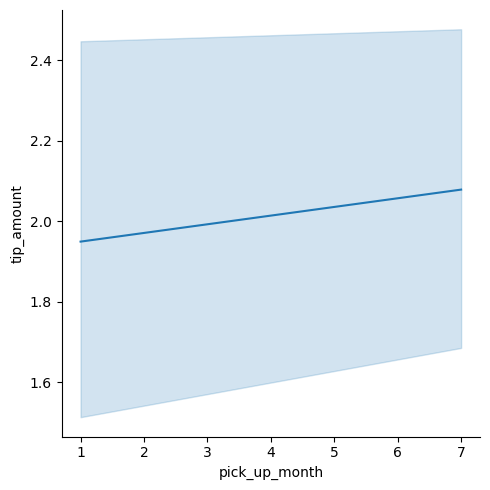

In [8]:
sns.relplot(x='pick_up_month', y='tip_amount', data=taxi, kind='line')

Back with more investigations. Here we will only focus on credit payments.

In [9]:
taxi['payment_type'].unique()

array([1., 2.])

In [10]:
print("Converting datetime columns in the 'taxi' DataFrame...")
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'], errors='coerce')
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'], errors='coerce')

Converting datetime columns in the 'taxi' DataFrame...


In [11]:
#filter for credit card payments
taxi_credit_card = taxi[taxi['payment_type'] == 1].copy()
print(f"\nOriginal DataFrame size: {len(taxi)} trips")
print(f"Credit Card trips only: {len(taxi_credit_card)} trips")
print(f"Percentage of Credit Card trips: {len(taxi_credit_card) / len(taxi) * 100:.2f}%")


Original DataFrame size: 200 trips
Credit Card trips only: 143 trips
Percentage of Credit Card trips: 71.50%


Feature Engineering: Tip Percentage and Time-based Features
Calculating tip percentage provides a normalized view of tipping behavior, independent of the absolute fare amount. Extracting month, hour, and day of week allows for granular temporal analysis.

In [12]:
# --- 1. Calculate Tip Percentage ---
# Handle cases where fare_amount might be 0 to avoid division by zero
# If fare_amount is 0, tip_percentage should also be 0 or NaN, or exclude such trips.
# We'll set it to 0 if fare is 0.
taxi_credit_card['tip_percentage'] = (taxi_credit_card['tip_amount'] / taxi_credit_card['fare_amount']) * 100
taxi_credit_card.loc[taxi_credit_card['fare_amount'] == 0, 'tip_percentage'] = 0

# Handle potential infinite values if fare_amount was extremely small but not zero (unlikely but good practice)
taxi_credit_card.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill any resulting NaNs (e.g., from small fare_amount + tip) with 0 or drop them
taxi_credit_card['tip_percentage'].fillna(0, inplace=True)

# Cap extreme outliers for tip percentage (e.g., tips > 100% of fare are usually data errors)
# You can decide on a reasonable cap based on your df.describe() for 'tip_percentage'
# Let's cap at 50% for demonstration, typical tips are 15-20%

taxi_credit_card['tip_percentage'] = taxi_credit_card['tip_percentage'].clip(upper=50)

print("\n Tip percentage calculated and outliers capped" )
print(taxi_credit_card[['fare_amount', 'tip_amount', 'tip_percentage']].describe())

# --- 2. Extract Temporal Features ---
# Now, these lines should work without error:
taxi_credit_card['pickup_month'] = taxi_credit_card['tpep_pickup_datetime'].dt.month # Changed to pickup_datetime
taxi_credit_card['pickup_hour'] = taxi_credit_card['tpep_pickup_datetime'].dt.hour   # Changed to pickup_datetime
taxi_credit_card['pickup_day_week'] = taxi_credit_card['tpep_pickup_datetime'].dt.dayofweek # Changed to pickup_datetime

# --- 3. Define Seasons ---
# Winter: Dec (12), Jan (1), Feb (2)
# Summer: Jun (6), Jul (7), Aug (8)

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [9,10,11]:
        return 'Autumn'
    return 'Unknown'

taxi_credit_card['season'] = taxi_credit_card['pick_up_month'].apply(get_season)
print("\nTemporal features and 'season' column created.")
print(taxi_credit_card['season'].value_counts())
    



 Tip percentage calculated and outliers capped
       fare_amount  tip_amount  tip_percentage
count   143.000000  143.000000      143.000000
mean     15.496503    2.816643       22.146355
std      15.257934    2.255088        8.679176
min       3.500000    0.000000        0.000000
25%       7.000000    1.550000       18.589744
50%       9.500000    2.160000       23.058824
75%      19.000000    3.425000       27.616667
max     120.000000   14.640000       44.250000

Temporal features and 'season' column created.
season
Winter    75
Summer    68
Name: count, dtype: int64


C:\Users\toshiba\AppData\Local\Temp\ipykernel_16328\1239722316.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_credit_card['tip_percentage'].fillna(0, inplace=True)


In [14]:
seasonal_tips = taxi_credit_card.groupby('season')['tip_percentage'].mean().reindex(['Winter','Summer','Autumn','spring'])
print("\nAverage tip percentage by season: ")
print(seasonal_tips)


Average tip percentage by season: 
season
Winter    19.871458
Summer    24.655433
Autumn          NaN
spring          NaN
Name: tip_percentage, dtype: float64


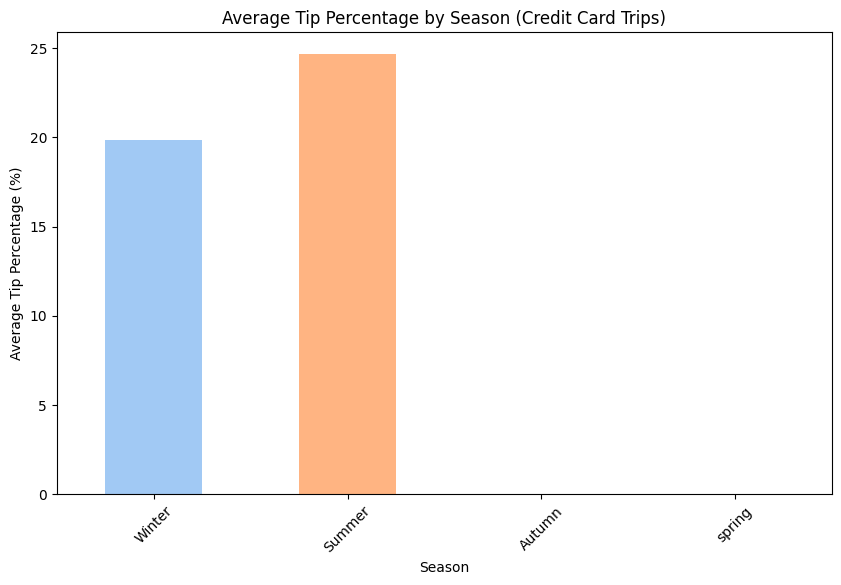

In [15]:
# Plotting Seasonal Tip Percentage
plt.figure(figsize=(10, 6))
seasonal_tips.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Average Tip Percentage by Season (Credit Card Trips)')
plt.xlabel('Season')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)
plt.show()

We can see that tips are higher during the Summer.

In [16]:
# --- 2. Influence of Time of Day ---
hourly_tips = taxi_credit_card.groupby('pickup_hour')['tip_percentage'].mean()
print("\nAverage tip percentage by hour of the day: ")
print(hourly_tips)


Average tip percentage by hour of the day: 
pickup_hour
0     14.759921
1     27.351648
2     24.221133
4     22.315789
5     22.170996
6     25.889524
7     25.579371
8     22.611553
9     20.978034
10    21.192353
11    21.815982
12    21.763499
13    18.164300
14    19.957892
15    26.776023
16    17.634488
17    17.405578
18    16.196313
19    24.639405
20    25.401682
21    24.936508
22    27.440102
23    17.308438
Name: tip_percentage, dtype: float64


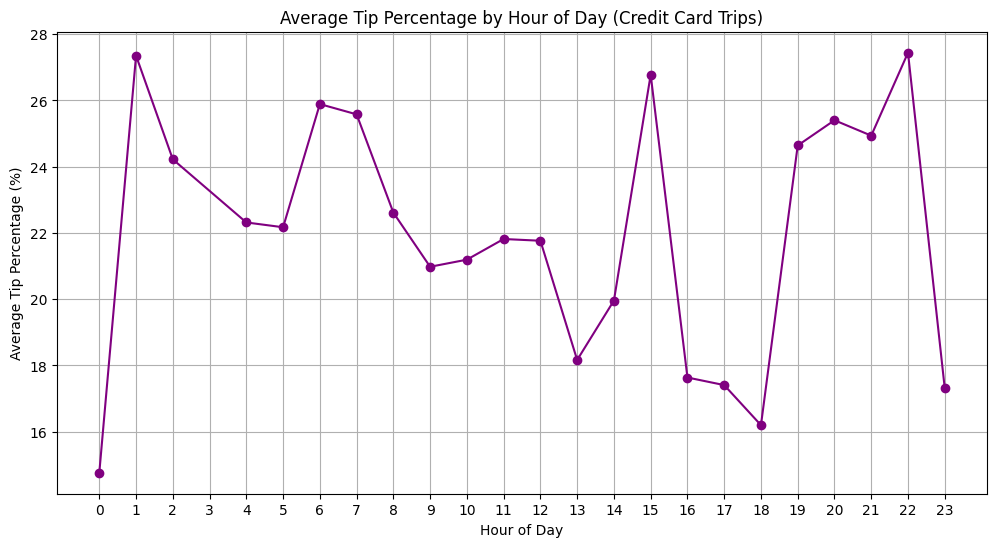

In [17]:
plt.figure(figsize=(12, 6))
hourly_tips.plot(kind='line', marker='o', color='purple')
plt.title('Average Tip Percentage by Hour of Day (Credit Card Trips)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Her we can see Average Tip Percentage by Hour of day .


Average Tip Percentage by Day of Week (Credit Card Trips Only):
pickup_day_name
Monday       22.708253
Tuesday      24.139116
Wednesday    19.586224
Thursday     23.084995
Friday       21.113549
Saturday     25.279851
Sunday       18.071326
Name: tip_percentage, dtype: float64


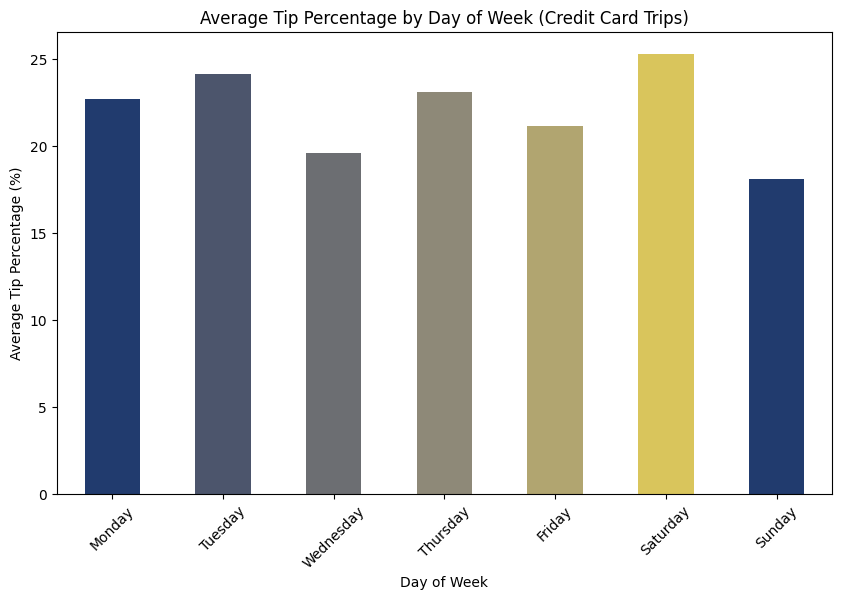

In [19]:
# --- 3. Influence of Day of Week ---
# Map dayofweek numbers to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
taxi_credit_card['pickup_day_name'] = taxi_credit_card['pickup_day_week'].map(day_names)

daily_tips = taxi_credit_card.groupby('pickup_day_name')['tip_percentage'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nAverage Tip Percentage by Day of Week (Credit Card Trips Only):")
print(daily_tips)

plt.figure(figsize=(10, 6))
daily_tips.plot(kind='bar', color=sns.color_palette("cividis"))
plt.title('Average Tip Percentage by Day of Week (Credit Card Trips)')
plt.xlabel('Day of Week')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)
plt.show()

Average Tip Percentage by Day of Week.

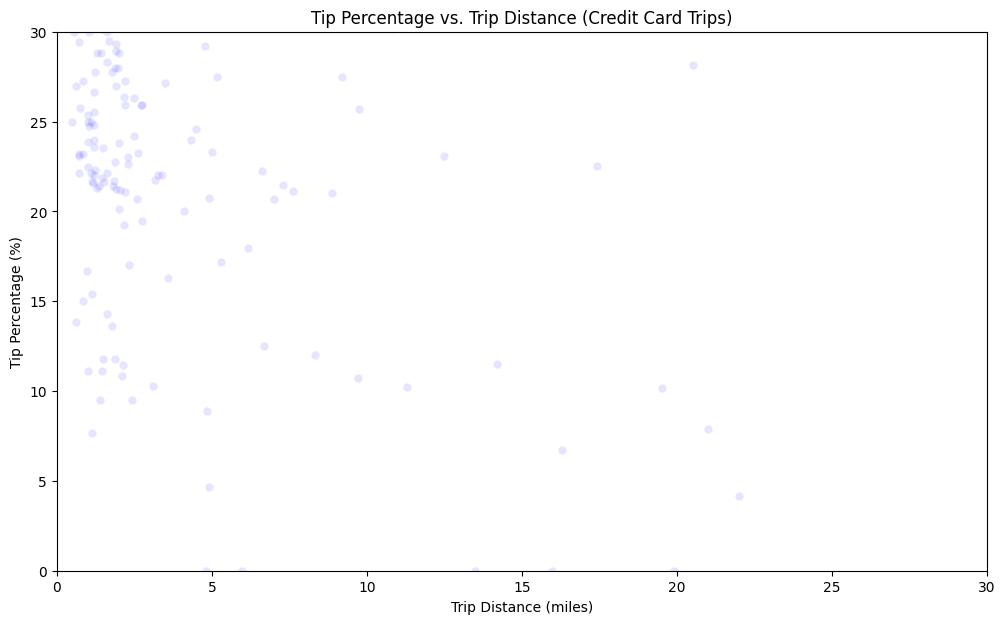

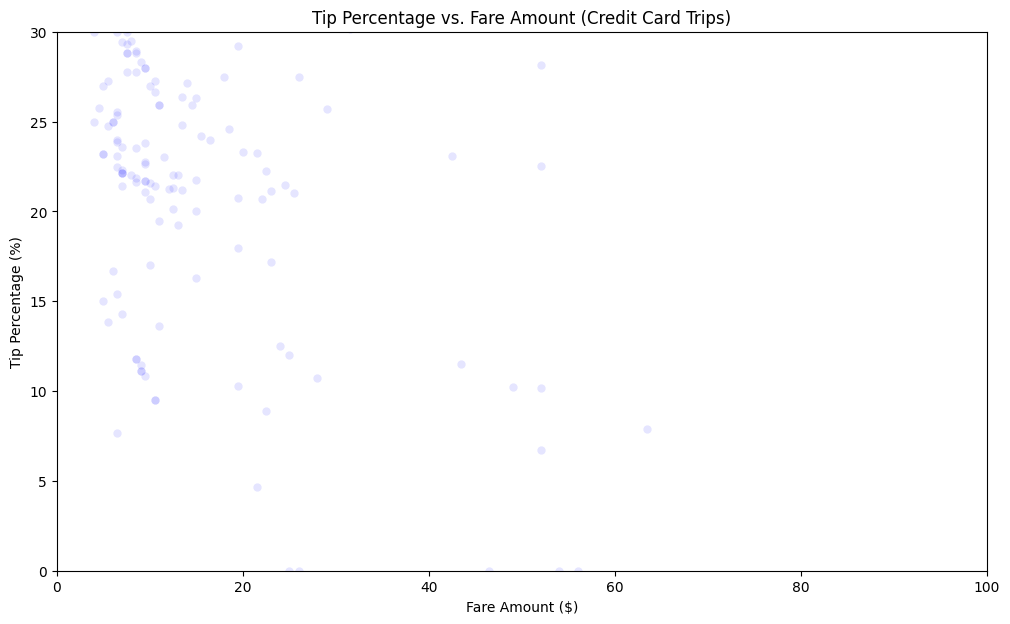

In [21]:
# --- 4. Influence of Trip Distance / Fare Amount ---
# Scatter plot for tip percentage vs. trip distance
plt.figure(figsize=(12, 7))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=taxi_credit_card.sample(n=min(10000, len(taxi_credit_card))), alpha=0.1, color='blue') # Sample for performance
plt.title('Tip Percentage vs. Trip Distance (Credit Card Trips)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage (%)')
plt.xlim(0, 30) # Limit x-axis to common trip distances
plt.ylim(0, 30) # Limit y-axis to common tip percentages
plt.show()

# Relationship between Fare Amount and Tip Amount (as a percentage of Total Amount)
# Useful to see if higher total amounts lead to lower/higher percentage tips
plt.figure(figsize=(12, 7))
sns.scatterplot(x='fare_amount', y='tip_percentage', data=taxi_credit_card.sample(n=min(10000, len(taxi_credit_card))), alpha=0.1, color='blue')
plt.title('Tip Percentage vs. Fare Amount (Credit Card Trips)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Tip Percentage (%)')
plt.xlim(0, 100)
plt.ylim(0, 30)
plt.show()


Average Tip Percentage by Passenger Count (Credit Card Trips Only):
passenger_count
0.0    27.849668
1.0    21.567281
2.0    21.598184
3.0    28.364534
4.0    23.560606
5.0    20.761905
6.0    21.250000
Name: tip_percentage, dtype: float64


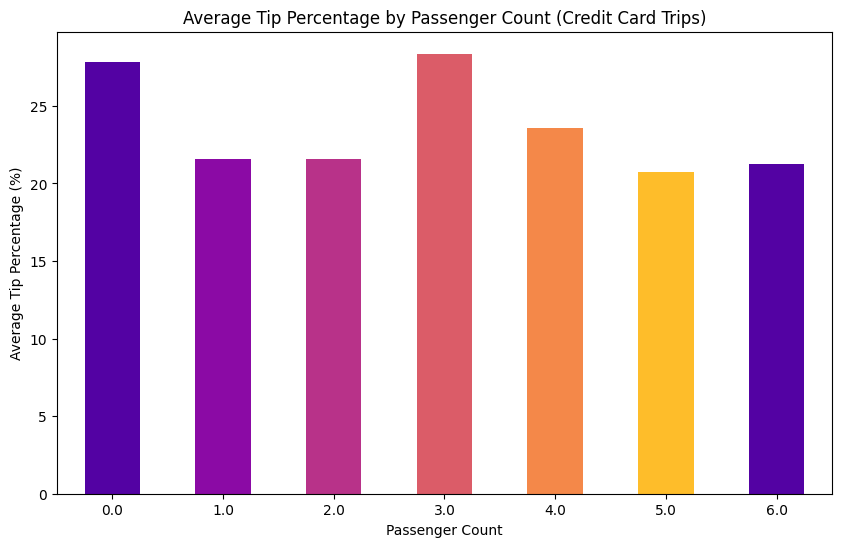

In [22]:
# --- 5. Influence of Passenger Count ---
passenger_tips = taxi_credit_card.groupby('passenger_count')['tip_percentage'].mean().sort_index()
print("\nAverage Tip Percentage by Passenger Count (Credit Card Trips Only):")
print(passenger_tips)

plt.figure(figsize=(10, 6))
passenger_tips.plot(kind='bar', color=sns.color_palette("plasma"))
plt.title('Average Tip Percentage by Passenger Count (Credit Card Trips)')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=0)
plt.show()
